# MAP 433
## Groupe 2
### Exploration Numérique 1

COSTA, Caio; SILVA CLAUDINO, Ariel; ZUIN RUIZ, Luis Henrique

### Question 1
![Screenshot 2024-09-12 at 22.31.16.png](<attachment:Screenshot 2024-09-12 at 22.31.16.png>)
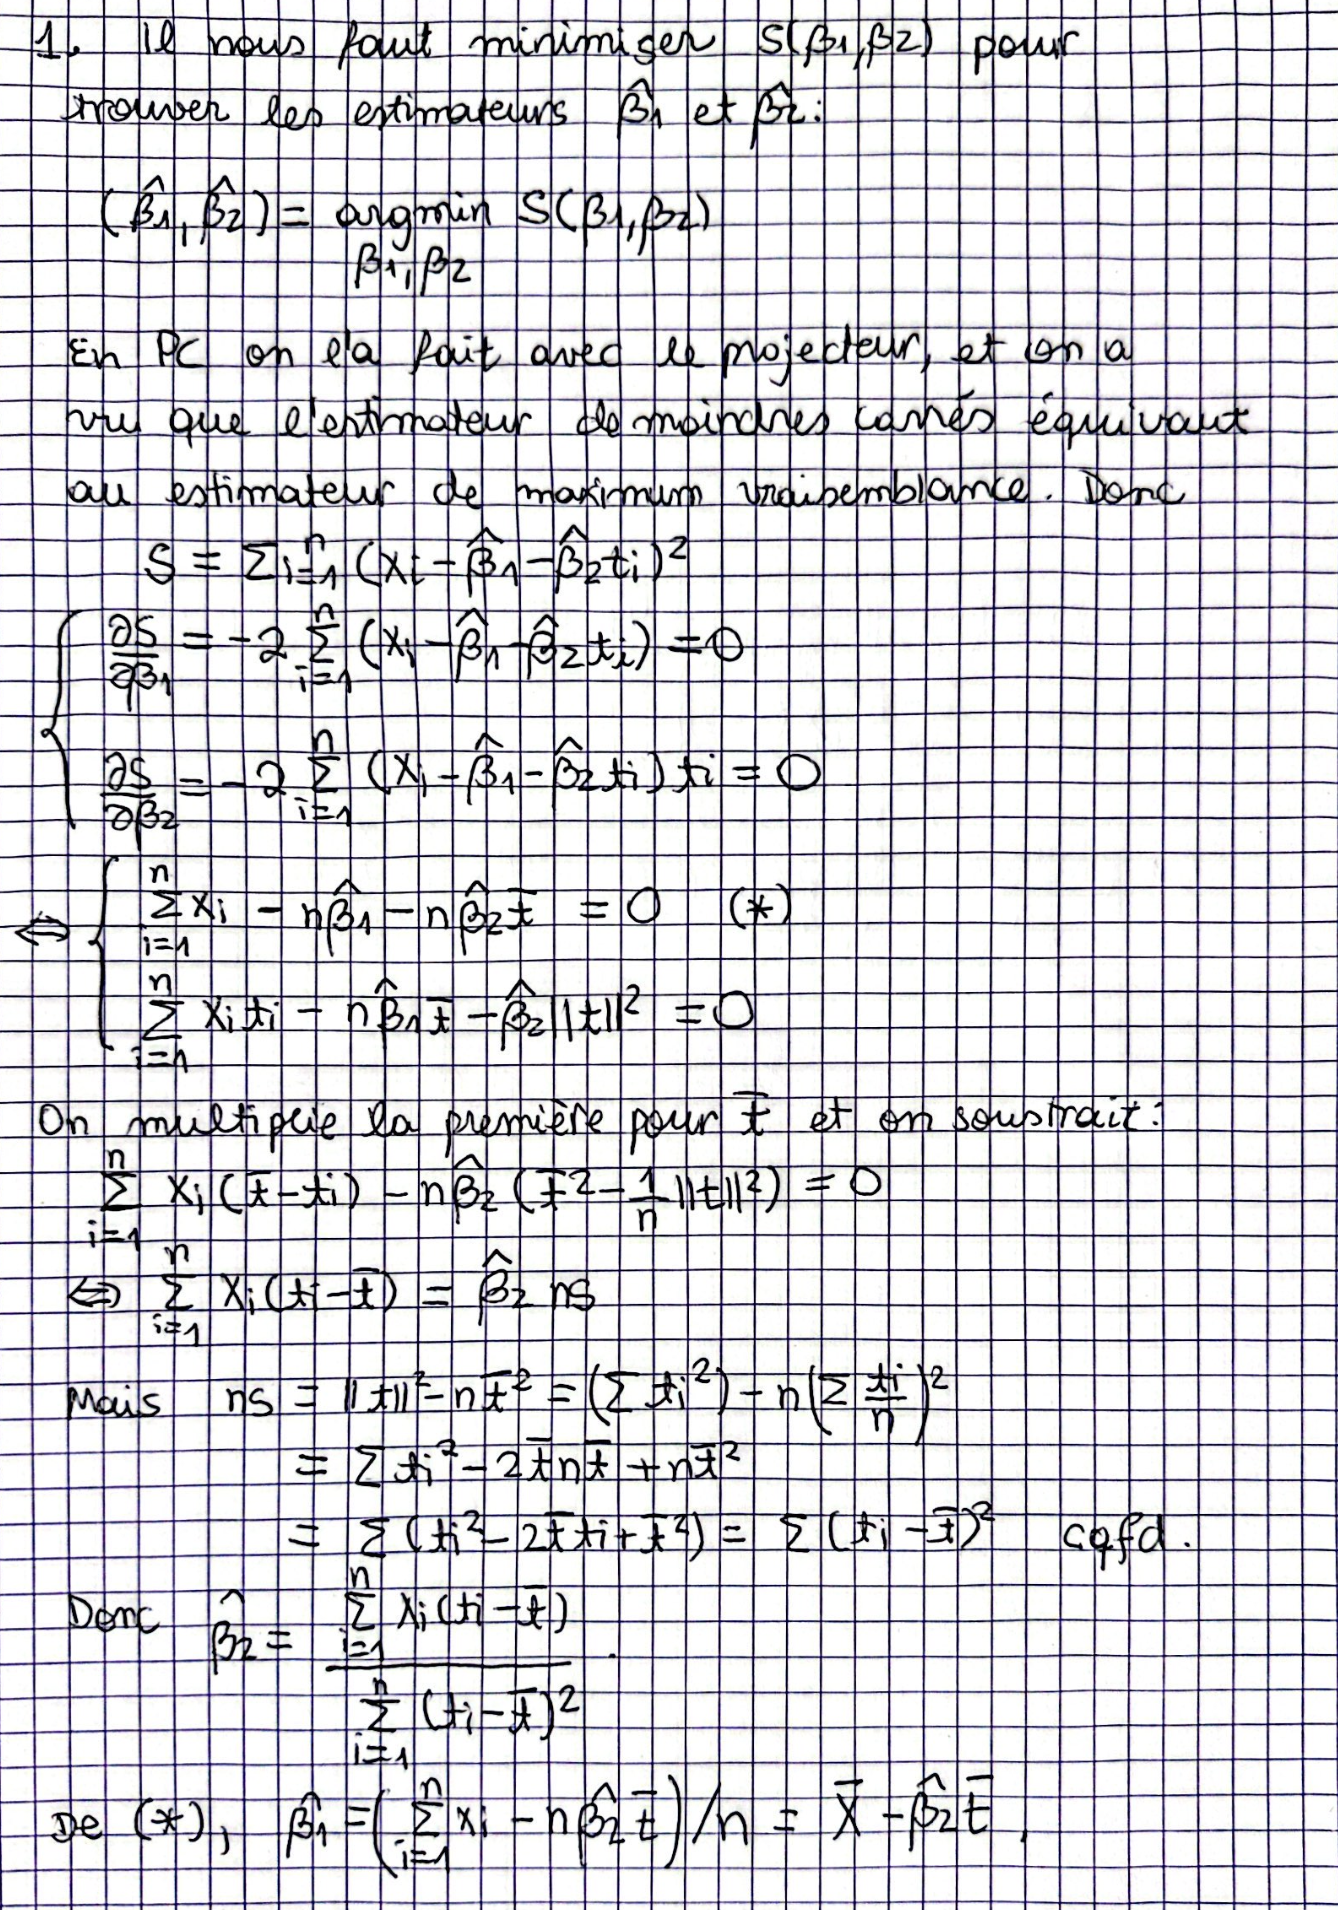

### Question 2

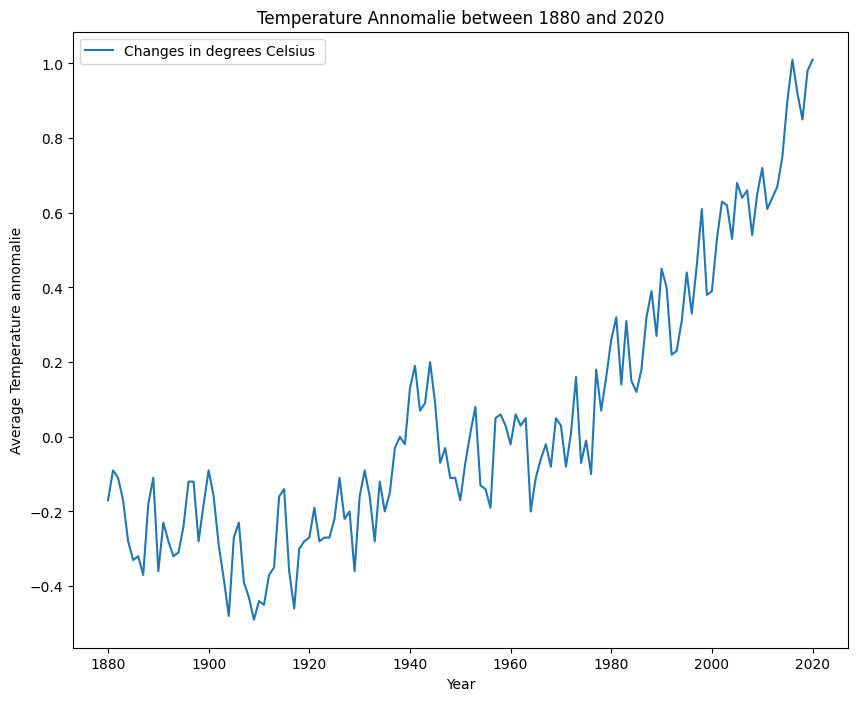

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
# charger les données 
url= "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
data=pd.read_csv(url, delimiter=",", skiprows=1)

data.replace("***", None, inplace=True)
dtype = {"Year": int, "Jan": float, "Feb": float, "Mar": float, "Apr": float, "May": float, "Jun": float, "Jul": float, "Aug": float, "Sep": float, "Oct": float, "Nov": float, "Dec": float, "J-D": float, "D-N": float, "DJF": float, "MAM": float, "JJA": float, "SON": float}
data = data.astype(dtype)
data = data[(data["Year"] >= 1880) & (data["Year"]<=2020)]

data = data.rename(columns={"J-D": "avg", "Year": "year"})

simp_data = data[["year", "avg"]]

plt.figure(figsize=(10, 8))
plt.plot(simp_data['year'], simp_data['avg'], label='Changes in degrees Celsius ' )
plt.xlabel('Year')
plt.ylabel('Average Temperature annomalie')
plt.title('Temperature Annomalie between 1880 and 2020')
plt.legend()
plt.show()

### Question 3

In [73]:
import numpy as np

period_size = 40 # n
jump_size = 10
first_year = 1880
end_year = 2020
num_of_periods = int((end_year-first_year-period_size+jump_size)/jump_size)
beta2_vec = np.zeros(num_of_periods)
beta1_vec = np.zeros(num_of_periods)
sigma_vec = np.zeros(num_of_periods)
sigma1_vec = np.zeros(num_of_periods)
sigma2_vec = np.zeros(num_of_periods)


for i in range(num_of_periods):
    initial_year = first_year + jump_size*i
    
    df_period = simp_data.where((simp_data["year"]>=initial_year)&(simp_data["year"]<=(initial_year+period_size))).dropna()
    t_barre = initial_year + period_size/2
    x_barre = np.mean(df_period["avg"])
    df_period["dif_year"] = (df_period["year"]-t_barre)

    df_period["top_info"] = df_period["dif_year"]*df_period["avg"]
    df_period["bottom_info"] = df_period["dif_year"]**2

    denominator = np.sum(df_period["bottom_info"])
    numerator = np.sum(df_period["top_info"])

    beta2 = numerator/denominator

    beta1 = x_barre -beta2*t_barre

    df_period["x_chap"] = beta1 + beta2 * df_period["year"]
    df_period["eps_chap"] = df_period["avg"] - df_period["x_chap"]

    norm = np.linalg.norm(df_period["eps_chap"])
    sigma = norm**2/(period_size-2)

    beta1_vec[i] = beta1
    beta2_vec[i] = beta2
    sigma_vec[i] = sigma

    # Calculates sigma1 and sigma2 that will be used in question number 4

    sigma1_vec[i] = np.sqrt(np.sum(np.square(df_period["year"]))*sigma/(denominator*period_size))
    sigma2_vec[i] = np.sqrt(sigma/denominator)


print(beta1_vec)
print(beta2_vec)
print(sigma_vec)
print(sigma1_vec)
print(sigma2_vec)

    

[  7.21369338  -1.08599303 -14.29578397 -20.96468641 -13.02662021
  -3.36245645  -1.24268293 -19.67702091 -27.31094077 -35.0812892
 -38.01554007]
[-0.00394251  0.0004216   0.00731882  0.01077875  0.00666899  0.00170557
  0.00063763  0.01001916  0.01387631  0.01779094  0.01926655]
[0.01177973 0.01230152 0.01338652 0.01241841 0.01351448 0.01267433
 0.01343461 0.01212305 0.01048282 0.00876826 0.00967022]
[2.75572394 2.83091663 2.96858384 2.87411681 3.01380679 2.9336684
 3.03586495 2.89858482 2.70905655 2.49013867 2.62821996]
[0.00143256 0.00146394 0.00152714 0.00147088 0.00153442 0.00148596
 0.00152988 0.00145328 0.0013514  0.00123595 0.00129796]


### Question 4

Comme $\frac{n-2}{\sigma^2}\hat{\sigma}^2$ suit une lois $\chi^2$ à $(n-2)$ degrés de liberté, et $\frac{\hat{\beta}_j-\beta_{j}}{\hat{\sigma}_j}$ suit une loi de Student à $(n-2)$ degrés de liberté, nous avons trouvé les formules suivantes pour les intervales de confiance des estimateurs:

$$
Ic_{\sigma^2} = \left[\frac{(n-2)\hat{\sigma}^2}{q^{n-2}_{1-\alpha/2}}; \frac{(n-2)\hat{\sigma}^2}{q^{n-2}_{\alpha/2}} \right]\\

Ic_{\beta_{j}} = \left[ \hat{\beta_{j}}-t^{n-2}_{1-\alpha/2}\cdot\hat{\sigma_{j}};  \hat{\beta_{j}}-t^{n-2}_{\alpha/2}\cdot\hat{\sigma_{j}} \right]

$$

avec $q^{n-2}$ et $t^{n-2}$ les quartilles associées aux lois $\chi^2$ et Student, respectivement.

In [62]:
import scipy.stats as stats
alpha = 0.05
deg_freed = period_size - 2

# Find quartiles for chi2 distribution
q_alpha_2 = stats.chi2.ppf(alpha / 2, deg_freed)
q_1_alpha_2 = stats.chi2.ppf(1 - alpha / 2, deg_freed)

# Find quartiles for Student distribution
t_alpha_2 = stats.t.ppf(alpha / 2, deg_freed)
t_1_alpha_2 = stats.t.ppf(1 - alpha / 2, deg_freed)

ic_sigma = [deg_freed*sigma_vec/q_1_alpha_2, deg_freed*sigma_vec/q_alpha_2]
ic_beta1 = [beta1_vec-t_1_alpha_2*sigma1_vec, beta1_vec-t_alpha_2*sigma1_vec]
ic_beta2 = [beta2_vec-t_1_alpha_2*sigma2_vec, beta2_vec-t_alpha_2*sigma2_vec]

print(ic_sigma)
print(ic_beta1)
print(ic_beta2)

[array([0.00786758, 0.00821607, 0.00894074, 0.00829414, 0.0090262 ,
       0.00846507, 0.00897285, 0.00809688, 0.00700138, 0.00585624,
       0.00645865]), array([0.01956554, 0.0204322 , 0.02223433, 0.02062635, 0.02244686,
       0.02105141, 0.0223142 , 0.02013577, 0.01741144, 0.01456364,
       0.01606174])]
[array([  1.63502191,  -6.81688414, -20.30536777, -26.78303171,
       -19.12775308,  -9.30135763,  -7.38847022, -25.5448991 ,
       -32.79513905, -40.12231138, -43.33609322]), array([ 12.79236485,   4.64489808,  -8.28620017, -15.14634112,
        -6.92548734,   2.57644474,   4.90310437, -13.80914271,
       -21.82674249, -30.04026702, -32.69498692])]
[array([-0.00684257, -0.00254199,  0.00422729,  0.00780111,  0.00356272,
       -0.00130259, -0.00245944,  0.00707715,  0.01114054,  0.01528889,
        0.01663896]), array([-0.00104245,  0.0033852 ,  0.01041034,  0.01375638,  0.00977526,
        0.00471374,  0.0037347 ,  0.01296118,  0.01661207,  0.02029299,
        0.02189414])]


### Question 5

Et, comme l'incertitude de $\hat{X_i}=\hat{\beta_1} +\hat{\beta_2}*t_i$ est donnée par $\sigma_{X_i}=\sqrt{\hat{\sigma_{1}}^{2}+(t_i*\hat{\sigma_{2}})^{2}}$, nous avons que l'intervalle de confiance est donnée par:

$Ic_{X_i} = \left[\hat{\beta_1} +\hat{\beta_2}*t_i - r_{\alpha/2}*\sigma_{X_i}; \hat{\beta_1} +\hat{\beta_2}*t_i + r_{\alpha/2}*\sigma_{X_i} \right]$

Où $r_{\alpha/2}$ est le quantile associé à la gaussienne.

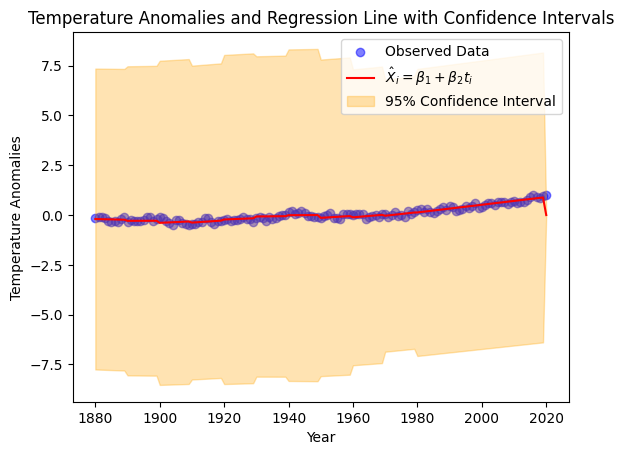

In [78]:


t = np.array(simp_data["year"])  # Time points
temp_observed = np.array(simp_data["avg"])

# Normal quantile:
r_alpha_2 = stats.norm.ppf(alpha / 2)

temp_pred = np.zeros(t.size)
ci_lower = np.zeros(t.size)
ci_upper = np.zeros(t.size)



for i in range(num_of_periods):
    initial_position = jump_size*i
    temp_pred[initial_position:(initial_position+40)] = beta1_vec[i] + beta2_vec[i] * t[initial_position:(initial_position+40)]
    sigma_x = np.sqrt(sigma1_vec[i]**2+np.square(t[initial_position:(initial_position+40)]*sigma2_vec[i]))
    # Confidence intervals
    ci_lower[initial_position:(initial_position+40)] = temp_pred[initial_position:(initial_position+40)]-r_alpha_2*sigma_x
    ci_upper[initial_position:(initial_position+40)] = temp_pred[initial_position:(initial_position+40)]+r_alpha_2*sigma_x

plt.scatter(t, temp_observed, label="Observed Data", color="blue", alpha=0.5)

# Plot regression line
plt.plot(t, temp_pred, label=r"$\hat{X}_i = \beta_1 + \beta_2 t_i$", color="red")

# Plot confidence intervals
plt.fill_between(t, ci_lower, ci_upper, color="orange", alpha=0.3, label="95% Confidence Interval")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Temperature Anomalies")
plt.title("Temperature Anomalies and Regression Line with Confidence Intervals")
plt.legend()

# Show the plot
plt.show()




### Question 6

Ensuite, nous voudrons calculer les résidues standardisés, selon la formule suivante:

$t_i = \frac{\hat{X_i}-X_i}{\hat{\sigma}\sqrt{1-h_{ii}}}$

où $H=(h_{ij})$ est telle qui satisfait $\hat{X}=HX$, avec $H=T(T^{t}T)^{-1}T^{t}$. En ce cas, nous trouvons:

$h_{ii} = \frac{nt_i^2 - 2t_i \sum t_i + \sum t_i^2}{n \sum_{i=1}^{n} t_i^2 - \left( \sum_{i=1}^{n} t_i \right)^2}$

 


In [111]:
residues = []
for j in range(num_of_periods):
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    period_t = simp_data.where((simp_data['year'] >= 1880+j*10) & (simp_data['year'] <= 1920+j*10)).dropna()["year"]
    peiord_t = period_t.astype(dtype={"year": int})
    
    obs = []
    for year in period_t:
        valeur = simp_data.where(simp_data["year"]== year)["avg"].dropna()
        if not valeur.empty:
            obs.append(valeur.all())
    
    prediction = beta1_vec[j] + beta2_vec[j]*t
    intervalle_residues = []
    for i in range(41):
        sum_t = np.sum(t)
        sum_sq_t = np.sum(np.square(t))
        hii = (41*(t[i]**2) - 2*t[i]*sum_t + sum_sq_t)/(41*sum_sq_t - sum_t**2)
        residue = (prediction[i] - obs[i])/np.sqrt(np.sqrt(sigma_vec[j])*(1 - hii))
        intervalle_residues.append(residue)
    # We keep the residues for each time interval
    residues.append(intervalle_residues)
# We then print the residues as it follows:
print(residues)

[[-3.821273073964146, -3.819549639499742, -3.8186152731202974, -3.8184529915643366, -3.8190475404320283, -3.8203852961746554, -3.822454179110355, -3.8252435764459616, -3.8287442744201474, -3.832948398801523, -3.8378493630796884, -3.843441823779196, -3.8497216424085217, -3.8566858536293616, -3.864332639297996, -3.872661308090566, -3.8816722804796817, -3.891367078881047, -3.9017483228372702, -3.9128197291518645, -3.9245861169309104, -3.937053417533055, -3.950228689471711, -3.9641201383564164, -3.9787371420047397, -3.9940902809016627, -4.010191374231566, -4.027053521758688, -4.0446911518867505, -4.063120076287461, -4.082357551552522, -4.102422348394946, -4.12333482900462, -4.145117033251441, -4.167792774528311, -4.191387746138248, -4.215929639256316, -4.241448273641343, -4.267975742436705, -4.295546572588174, -4.324197902623361], [-4.0669859050932535, -4.0504948728033625, -4.034946613900946, -4.020313216377227, -4.006568967896032, -3.9936902147749156, -3.981655235382628, -3.97044412654312

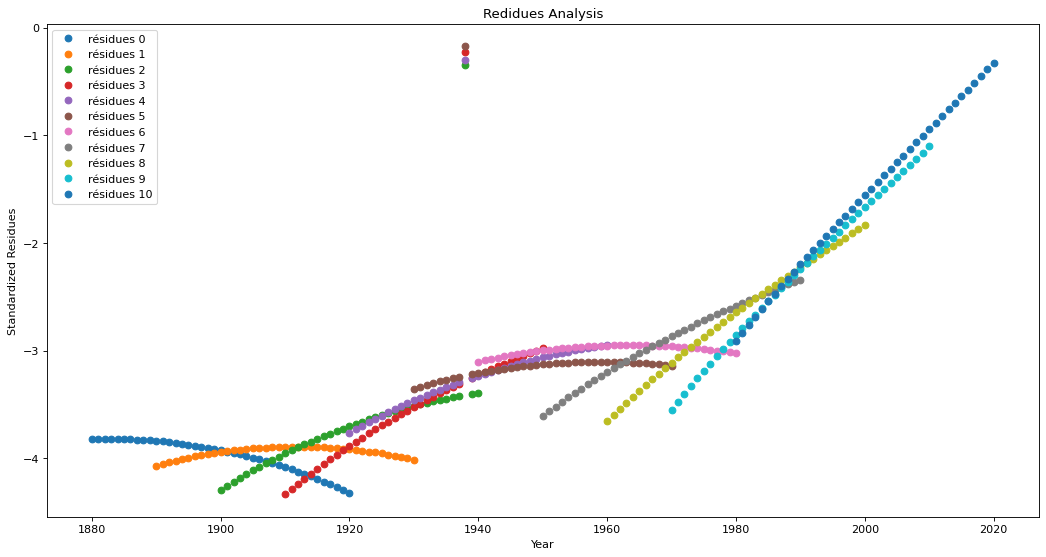

In [112]:

plt.figure(figsize=(16, 8), dpi=80)
for j in range(num_of_periods):
    
    t = np.array([ i for i in range(1880+j*10,1921+j*10)])
    period_t = simp_data.where((simp_data['year'] >= 1880+j*10) & (simp_data['year'] <= 1920+j*10)).dropna()["year"]
    T = period_t.astype(dtype={"year": int})
    
    plt.plot(T, residues[j], 'o', label='résidues {}'.format(j) )
    
plt.xlabel('Year')
plt.ylabel('Standardized Residues')
plt.title('Redidues Analysis')
plt.legend()
plt.show()

### Exercice 7

L’analyse des données d’anomalies de température présentées dans cet exercice montre clairement une tendance persistante à la hausse des températures mondiales. Cette tendance est en accord avec les conclusions de nombreuses études sur le changement climatique et le réchauffement global.

Le graphique des résidus confirme que le modèle de régression linéaire représente fidèlement les données observées. On remarque que dans les périodes où les résidus sont plus faibles, les fluctuations de température sont également moins irrégulières, ce qui permet de mieux discerner la tendance au réchauffement.

De plus, l’incertitude élevée dans l’estimation du coefficient linéaire (bêta1), reflétée par la grande valeur de l’écart-type ($\sigma_1$), contribue à la largeur de l’intervalle de confiance des prévisions. Cela explique la large plage associée à l’intervalle de confiance à 95%, en particulier lorsqu’il s’agit de projections futures des températures.

En conclusion, le modèle de régression linéaire adopté ici s’avère bien adapté à cette analyse, car il permet de représenter efficacement les tendances et les évolutions observées des anomalies de température globale.